# Implementation will feature pyCombinatorial

In [1]:
pip install pyCombinatorial

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pyCombinatorial.utils import graphs, util
from scipy.spatial.distance import cdist
import os

# algorithm
from pyCombinatorial.algorithm import nearest_neighbour

In [19]:
def generate_cities(n, seed=42):
    np.random.seed(seed)
    return np.random.uniform(0, 500, size=(n, 2))

def display_distance_matrix(matrix):
    df = pd.DataFrame(matrix)
    print(df.round(2))
    
def create_distance_matrix(cities):
    return cdist(cities, cities, metric='euclidean')

In [20]:
cities = generate_cities(21)
dist_matrix = create_distance_matrix(cities)
pd.DataFrame(dist_matrix).round(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.00,250.86,412.11,163.78,165.99,177.24,434.42,395.57,215.86,330.99,...,295.07,92.26,235.10,465.07,407.12,154.75,303.99,427.95,298.57,260.42
1,250.86,0.00,363.21,362.53,85.29,401.23,199.58,344.65,217.04,214.79,...,248.71,166.53,269.49,284.79,222.93,376.65,156.98,329.26,82.77,309.34
2,412.11,363.21,0.00,358.45,354.58,412.55,339.38,18.82,198.72,153.64,...,125.28,348.53,180.45,224.97,225.88,399.05,519.88,79.82,299.90,170.44
3,163.78,362.53,358.45,0.00,282.79,55.15,506.74,346.95,210.45,342.91,...,275.95,203.07,189.68,489.25,443.24,41.50,454.69,403.54,378.67,188.24
4,165.99,85.29,354.58,282.79,0.00,318.42,273.53,335.81,174.46,224.93,...,230.34,82.13,222.89,330.84,268.79,293.83,189.04,339.30,140.26,262.13
5,177.24,401.23,412.55,55.15,318.42,0.00,555.21,401.43,263.92,396.81,...,330.91,236.52,244.80,543.09,495.87,24.59,479.37,458.66,424.58,242.73
6,434.42,199.58,339.38,506.74,273.53,555.21,0.00,325.63,306.84,204.10,...,280.91,342.71,350.55,145.89,114.38,531.83,305.38,270.07,135.89,382.32
7,395.57,344.65,18.82,346.95,335.81,401.43,325.63,0.00,181.32,136.19,...,106.82,330.66,165.66,216.41,212.96,387.17,501.24,74.88,282.11,158.73
8,215.86,217.04,198.72,210.45,174.46,263.92,306.84,181.32,0.00,133.08,...,79.43,150.72,52.55,279.20,233.17,243.46,359.82,213.54,194.65,92.29
9,330.99,214.79,153.64,342.91,224.93,396.81,204.10,136.19,133.08,0.00,...,79.36,247.27,161.00,146.34,106.54,376.54,371.58,115.84,146.48,185.50


In [14]:
# This implementation thus far is for undirected TSP as dist_matrix[i][j] == dist_matrix[j][i])
# Later on I might make it an asymmetric distance matrix, as in dist_matrix[i][j] ≠ dist_matrix[j][i]

In [21]:
# path
results_file = "nearest_neighbour_results.csv"
# sample amount being ran
num_samples = 1
# city sizes being test
city_sizes = [8]

if os.path.exists(results_file):
    saved_df = pd.read_csv(results_file)
    if 'samples' not in saved_df.columns:
        saved_df['samples'] = 1
    print("Resuming")
else:
    saved_df = pd.DataFrame(columns=['cities', 'distance', 'runtime_ms', 'samples'])
    print("Starting")

for size in city_sizes:
    print(f"\nProcessing {size} cities ({num_samples} samples)...")
    
    # arrays to track runtime and distance
    runtimes = []
    distances = []
    
    for sample in range(num_samples):
        cities = generate_cities(size, seed=42)
        dist_matrix = create_distance_matrix(cities)
        
        try:
            start = time.time()
            route, distance = nearest_neighbour(dist_matrix)
            runtime = (time.time() - start) * 1000
            
            runtimes.append(runtime)
            distances.append(distance)
            
            print(f"Sample {sample+1}: {runtime:.2f} ms | Distance: {distance:.2f}")
            
        except Exception as e:
            print(f"Error in sample {sample+1}: {e}")
            continue
    
    if runtimes: 
        avg_runtime = round(np.mean(runtimes), 2)
        avg_distance = round(np.mean(distances), 2)
        
        existing = saved_df[saved_df['cities'] == size]
        
        if not existing.empty:
            old_samples = existing['samples'].values[0]
            old_runtime = existing['runtime_ms'].values[0]
            old_distance = existing['distance'].values[0]
            
            total_samples = old_samples + len(runtimes)
            new_runtime = round((old_runtime * old_samples + avg_runtime * len(runtimes)) / total_samples, 2)
            new_distance = round((old_distance * old_samples + avg_distance * len(runtimes)) / total_samples, 2)
            
            saved_df.loc[saved_df['cities'] == size, ['runtime_ms', 'distance', 'samples']] = [
                new_runtime, new_distance, total_samples
            ]
        else:
            # Add new entry
            new_row = pd.DataFrame([{
                'cities': size,
                'distance': avg_distance,
                'runtime_ms': avg_runtime,
                'samples': len(runtimes)
            }])
            saved_df = pd.concat([saved_df, new_row], ignore_index=True)
        
        # Save with 2 decimal points
        saved_df['distance'] = saved_df['distance'].apply(lambda x: round(float(x), 2))
        saved_df['runtime_ms'] = saved_df['runtime_ms'].apply(lambda x: round(float(x), 2))
        saved_df.to_csv(results_file, index=False, float_format='%.2f')
        
        print(f"Updated averages for {size} cities (Total samples: {saved_df.loc[saved_df['cities'] == size, 'samples'].values[0]})")

# output
saved_df['distance'] = saved_df['distance'].map('{:.2f}'.format)
saved_df['runtime_ms'] = saved_df['runtime_ms'].map('{:.2f}'.format)
print("\nBenchmark complete! Final results:")
print(saved_df)

Resuming

Processing 8 cities (1 samples)...
Iteration =  0 Distance =  1386.16
Iteration =  1 Distance =  1386.16
Iteration =  2 Distance =  1386.16
Iteration =  3 Distance =  1386.16
Iteration =  4 Distance =  1386.16
Iteration =  5 Distance =  1386.16
Iteration =  6 Distance =  1386.16
Iteration =  7 Distance =  1386.16
Sample 1: 27.50 ms | Distance: 1386.16
Updated averages for 8 cities (Total samples: 13)

Benchmark complete! Final results:
    cities distance   runtime_ms  samples
0        4  1136.30         2.62        7
1        8  1386.16        28.00       13
2       12  1486.25       257.15        6
3       16  1608.22       698.40       11
4       20  1932.15      1916.62       11
5       24  2033.59      4703.92        6
6       28  2178.64      9252.58       16
7       32  2293.72     11524.10        6
8       36  2313.43     20509.19        1
9       40  2458.17     27933.10        1
10      23  2025.73      2942.82        6
11      25  2036.54      5327.71       16
12  

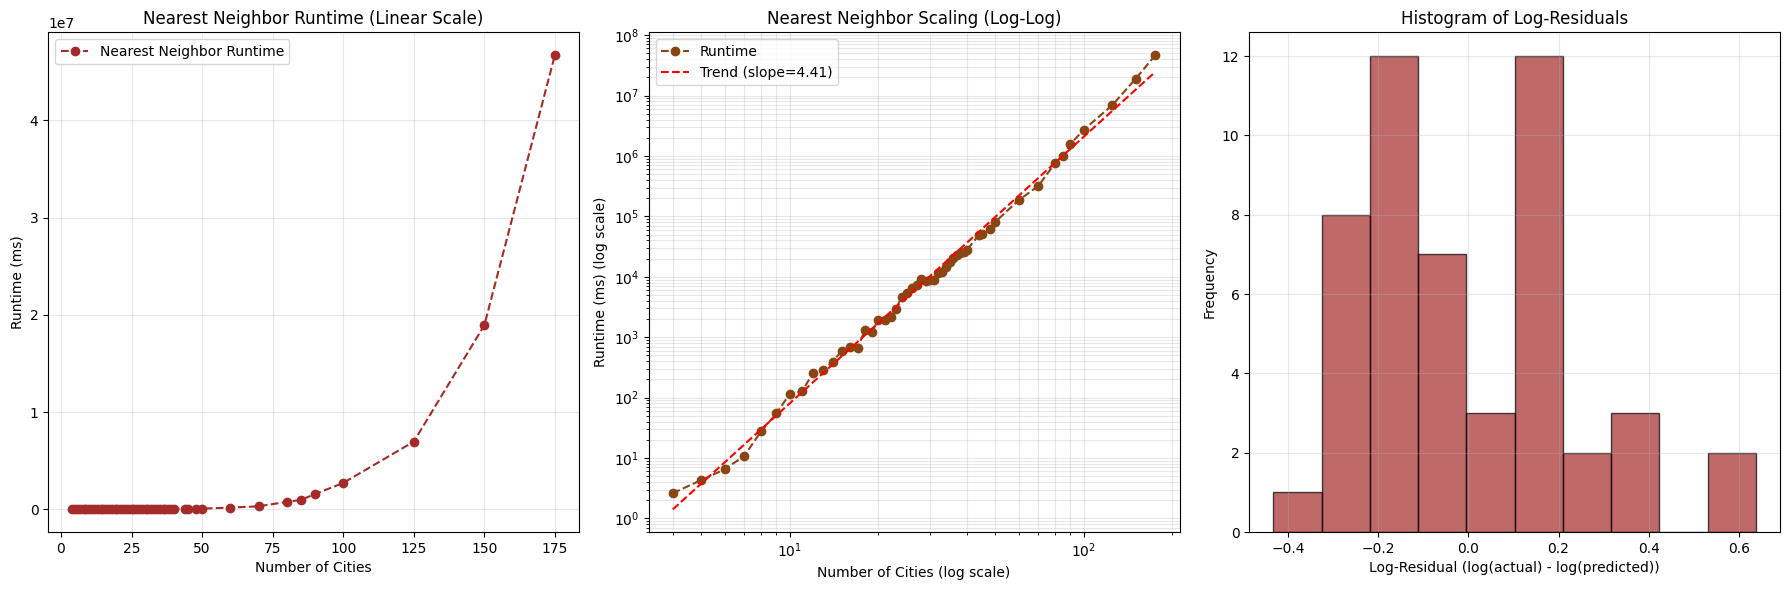

Estimated complexity exponent: 4.41
This suggests worse-than-expected scaling (possibly inefficient implementation)


In [22]:
# File path
results_file = "nearest_neighbour_results.csv"

# Load results
if os.path.exists(results_file):
    df = pd.read_csv(results_file)

    # Filter values
    df = df.sort_values(by='cities')
    df = df[df['runtime_ms'] > 0]

    # Trendline
    log_cities = np.log(df['cities'])
    log_runtime = np.log(df['runtime_ms'])

    # Linear regression
    coeffs = np.polyfit(log_cities, log_runtime, 1)
    predicted_log_runtime = np.polyval(coeffs, log_cities)
    residuals = log_runtime - predicted_log_runtime

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Scatter plot (Left)
    ax1.plot(df['cities'], df['runtime_ms'],
             marker='o', linestyle='--',
             color='brown', label='Nearest Neighbor Runtime')
    ax1.set_title('Nearest Neighbor Runtime (Linear Scale)')
    ax1.set_xlabel('Number of Cities')
    ax1.set_ylabel('Runtime (ms)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Log-log plot (trendline)
    trend = np.exp(coeffs[1]) * (df['cities'] ** coeffs[0])
    ax2.loglog(df['cities'], df['runtime_ms'],
               marker='o', linestyle='--',
               color='saddlebrown', label='Runtime')
    ax2.loglog(df['cities'], trend,
               'r--', label=f'Trend (slope={coeffs[0]:.2f})')
    ax2.set_title('Nearest Neighbor Scaling (Log-Log)')
    ax2.set_xlabel('Number of Cities (log scale)')
    ax2.set_ylabel('Runtime (ms) (log scale)')
    ax2.grid(True, which='both', alpha=0.3)
    ax2.legend()

    # Histogram of residuals (right)
    ax3.hist(residuals, bins=10, color='brown', edgecolor='black', alpha=0.7)
    ax3.set_title('Histogram of Log-Residuals')
    ax3.set_xlabel('Log-Residual (log(actual) - log(predicted))')
    ax3.set_ylabel('Frequency')
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Estimated complexity exponent: {coeffs[0]:.2f}")
    if coeffs[0] > 3.0:
        print("This suggests worse-than-expected scaling (possibly inefficient implementation)")
    elif coeffs[0] > 2.0:
        print("This suggests quadratic complexity (O(n²))")
    elif coeffs[0] > 1.0:
        print("This suggests linear to quadratic scaling")
    else:
        print("This suggests very efficient scaling (near-linear or sub-linear)")

else:
    print("No saved results found.")

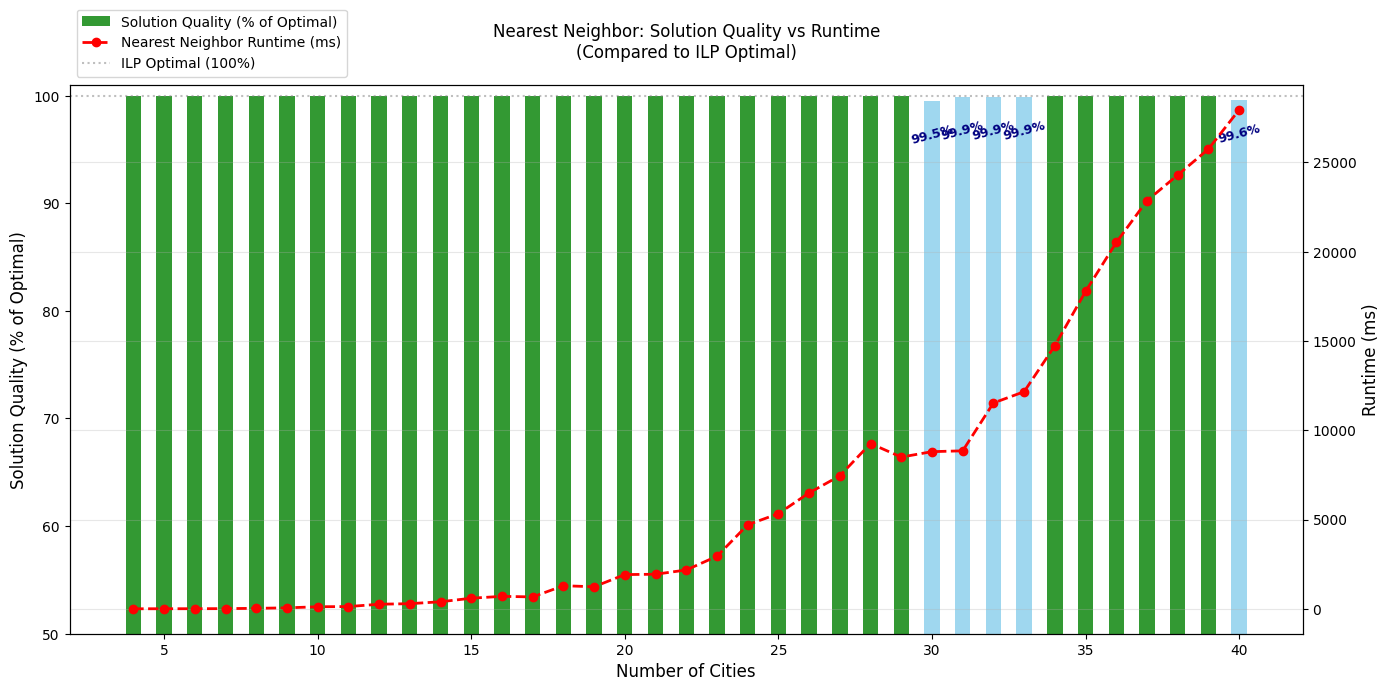

In [23]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
# paths
nn_file = "nearest_neighbour_results.csv"
ilp_file = "ilp_results.csv"

if os.path.exists(nn_file) and os.path.exists(ilp_file):
    nn_df = pd.read_csv(nn_file).sort_values('cities')
    ilp_df = pd.read_csv(ilp_file).sort_values('cities')
    
    # Merge datasets
    merged_df = pd.merge(nn_df, ilp_df, on='cities', suffixes=('_nn', '_ilp'))
    
    # 100 * (optimal / actual)
    merged_df['optimality_pct'] = (merged_df['distance_ilp'] / merged_df['distance_nn']) * 100
    
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    # Colour array and format labels
    colors = []
    display_values = []
    for pct in merged_df['optimality_pct']:
        if pct == 100:  # Exact 100%
            colors.append('green')
            display_values.append('')
        elif pct >= 99.9:  # Show as 99.9%
            colors.append('skyblue')
            display_values.append('99.9%')
        else:  # Show actual value with 1 decimal
            colors.append('skyblue')
            display_values.append(f'{pct:.1f}%')
    
    # Bars
    bar_width = 0.5
    bars = ax1.bar(merged_df['cities'],
                   merged_df['optimality_pct'],
                   width=bar_width,
                   color=colors,
                   alpha=0.8,
                   label='Solution Quality (% of Optimal)')
    
    heights = [bar.get_height() for bar in bars]
    
    for i, bar in enumerate(bars):
        if display_values[i]: 
            # vertical offset
            y_offset = -4  
            
            if i > 0 and abs(heights[i] - heights[i-1]) < 5:
                y_offset = -8 if heights[i] > heights[i-1] else -2
            if i < len(bars)-1 and abs(heights[i] - heights[i+1]) < 5:
                y_offset = -8 if heights[i] > heights[i+1] else -2
                
            ax1.text(bar.get_x() + bar.get_width() / 2., 
                    heights[i] + y_offset,
                    display_values[i],
                    ha='center', 
                    va='top' if y_offset > -5 else 'bottom',
                    color='navy', 
                    fontsize=9,
                    fontweight='bold',
                    rotation=15 if len(merged_df) > 10 else 0)
    
    # runtime
    ax2 = ax1.twinx()
    line, = ax2.plot(merged_df['cities'], merged_df['runtime_ms_nn'],
                     marker='o', linestyle='--',
                     color='red',  # SaddleBrown color for NN
                     linewidth=2,
                     label='Nearest Neighbor Runtime (ms)')
    
    # format
    ax1.set_xlabel('Number of Cities', fontsize=12)
    ax1.set_ylabel('Solution Quality (% of Optimal)', fontsize=12)
    ax1.set_ylim(50, 101)  # Wider range for NN's variable performance
    ax2.set_ylabel('Runtime (ms)', fontsize=12)
    
    # 100% line
    ax1.axhline(100, color='gray', linestyle=':', alpha=0.5, label='ILP Optimal (100%)')
    
    # Legends
    lines = [bars, line, ax1.lines[-1]]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 1.15))
    
    plt.title('Nearest Neighbor: Solution Quality vs Runtime\n(Compared to ILP Optimal)', pad=20)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

elif not os.path.exists(nn_file):
    print("No file found")
else:
    print("Missing")